# Karoo: Implement Phase

In this notebook, you will implement a tool for detecting and classifying animals from the Karoo dataset.  

As you verified during the design phase, the first prediction is not always the correct one. So, for doing this application useful you will annotate the picture with the best 3 predictions.

The steps you will complete in this notebook are the following:
1. Import Python packages
2. Load the metadata
3. Load the fine tuned model
4. Load the MegaDetector 
5. Detect and classify animals

## 1. Import Python Packages.

Run the next cell to import that Python packages you'll need for this lab.

Note the `import utils2` line. This line imports the functions that were specifically written for this lab. If you want to look at what these functions are, go to `File -> Open...` and open the `utils2.py` file to have a look.

In [2]:
import os, sys
import logging

# Tensorflow
import tensorflow as tf
from tensorflow.keras.applications import nasnet

# Libraries for displaying images in Jupyter
from IPython.display import display
# Library for loading images in Python
from PIL import Image

# Setup some paths for MegaDetector
os.environ['PYTHONPATH'] += ":/home/jovyan/work/ai4eutils"
os.environ['PYTHONPATH'] += ":/home/jovyan/work/CameraTraps"
os.environ['PYTHONPATH'] += ":/home/jovyan/work/yolov5"

sys.path.insert(0, "./ai4eutils")
sys.path.insert(0, "./CameraTraps")
sys.path.insert(0, "./yolov5")

# Silent the TF warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Ignore tf warning messages
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# Load the Pytorch Detector
from detection.pytorch_detector import PTDetector

# Load the utility functions
import utils2

print('All packages imported successfully!')

All packages imported successfully!


## 2. Load the Metadata

The following bit of code maps the labels into category names forward and backward. That is needed because the keras model predicts a number, but you want something human-readable. In the same cell you can define the important constants that you will use through the lab, like the image size and the number of image classes.

In [3]:
# Define important variables
IMAGE_DIR = 'sample_data'
IMAGE_SIZE = (224, 224)
NUM_CLASSES = 11

# Get the labels and categories
label2cat = utils2.get_labels()
cat2label = {v:k for k,v in label2cat.items()}
print(cat2label)


{'baboon': 0, 'bustardkori': 1, 'duiker': 2, 'eland': 3, 'gemsbokoryx': 4, 'hartebeestred': 5, 'jackalblackbacked': 6, 'kudu': 7, 'springbok': 8, 'steenbok': 9, 'zebramountain': 10}


## 3. Load the MegaDetector

You will need the MegaDetector again for detecting the animals on the pictures. The MegaDetector's output will be used for cropping the region of interest that will be feeded into the classfier; and after for drawing the rectangle on the original picture.

In [4]:
# Load the MegaDetector v5a model
model_file='md_v5a.0.0.pt'
megadetector = PTDetector(model_file)

Fusing layers... 
Fusing layers... 
Model summary: 574 layers, 139990096 parameters, 0 gradients
Model summary: 574 layers, 139990096 parameters, 0 gradients


## 4. Load the Fine-tuned Model

Now, you will load the pretrained classification model. It is the same model that you trained in the previous notebook. Remember that it uses NASNetMobile as the base model.

In [5]:
# Load the base model (NASNETMobile)
base_model = nasnet.NASNetMobile(include_top=False)

base_model.trainable = False

# Add the top layers for classifiying karoo pictures
model = utils2.get_transfer_model(
    model_to_transfer=base_model,
    num_classes=NUM_CLASSES,
    img_height=IMAGE_SIZE[0],
    img_width=IMAGE_SIZE[1],
)
# Load the weights of the fine tunned model
model_weight_path = 'models/model_cnn_finetuned_nasnet_150epocha_augmented.h5'
model.load_weights(model_weight_path)

20004864/19993432 [==============================] - 0s 0us/step


## 5. Detect and Classify Animals 

Now have a look at the final output. Below are two example images of correctly clasified oryxes and red hartebeests.

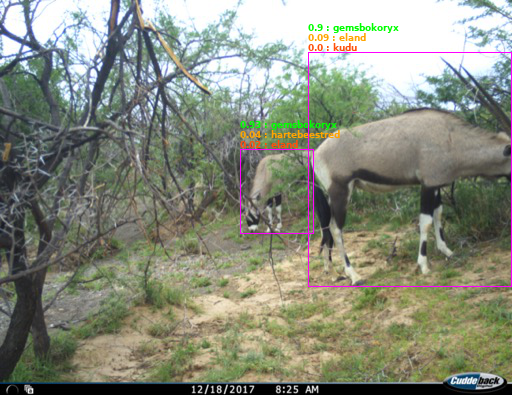

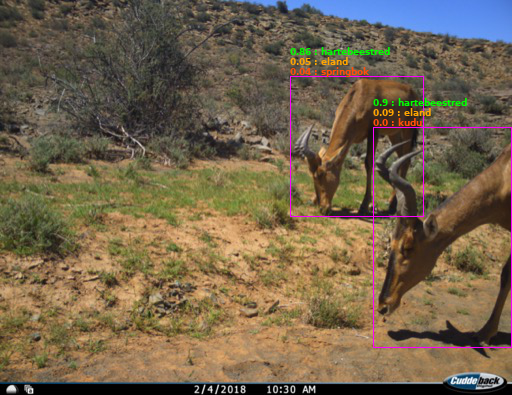

In [6]:
image = Image.open("sample_data/test/gemsbokoryx/KAR_S1_D01_R1_IMAG0341.JPG")
result = utils2.draw_bounding_box(image, megadetector, model, label2cat)
display(result)
image = Image.open("sample_data/test/hartebeestred/KAR_S1_B02_R1_IMAG1109.JPG")
result = utils2.draw_bounding_box(image, megadetector, model, label2cat)
display(result) 

Curious which images your classifier did poorly on? Here is an example of a picture with 3 jackals. The model correctly classifies two and fails on one.

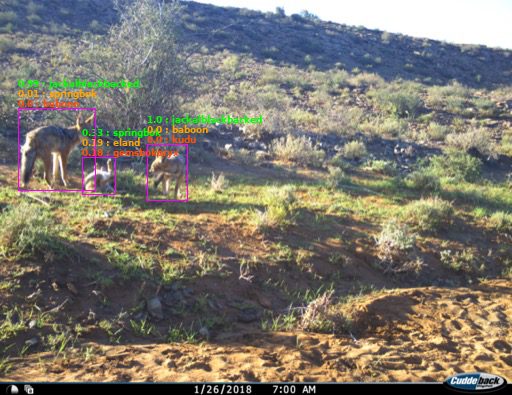

In [7]:
image = Image.open("sample_data/test/jackalblackbacked/KAR_S1_B02_R1_IMAG0937.JPG")
result = utils2.draw_bounding_box(image, megadetector, model, label2cat)
display(result) 

Now, you can use the sample data stored at Coursera to test you model. Select a picture that you want to classify from the Karoo dataset. Processing a single image can take up to 1 minute depending on its size. It is better if you select images from the test set, so you can see the model working on new images not used during training.

In [10]:
components = utils2.animal_detection_on_server(display, megadetector, model, label2cat)

display(components['fileChooser'])
display(components['output'])

FileChooser(path='/home/jovyan/work/sample_data/test', filename='', title='', show_hidden=False, select_desc='…

Output()

Do you have pictures that you want to try? You can upload your own pictures and see the result. Processing a single image can take up to 1 minute depending on its size. 

_The pictures will be transfered to the server. DeepLearning.AI do not keep records of those images, but we cannot guarantee that those files are not being accesed by other people, so use it at your own risk._

In [11]:
components2 = utils2.animal_detection_local(display, megadetector, model, label2cat)

display(components2['fileUpload'])
display(components2['output'])

FileUpload(value={}, accept='image/*', description='Upload')

Output()